We will be implementing the Pre trained Resnet from the work of https://github.com/pbaylies/stylegan-encoder by Peter Baylies to generate a baseline face for our encoding. We will download the Resnet weights and our Model Weights. We will be using a VGG Network and truncate it and use it as a lens for our images since Image Reduction is very time consuming. 

In [0]:
!gdown https://drive.google.com/uc?id=1cbsN39Jcfmp83djubNBuRb2rDAyIOPVP&export=download
!gdown https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
!gdown https://drive.google.com/u/0/uc?id=1iFXaRJi6O2IVHrjcjr_P2E0Xd0s_V6jq&export=download
!gdown https://drive.google.com/u/0/uc?id=1E1rY6VnNPNXJccBzX0TNltiVSC4XpZ5t&export=download
!gdown https://drive.google.com/u/0/uc?id=19KzKRjpRyi1sTY_xzk-J_POrzyna4dya&export=download
!rm -rf sample_data

Downloading...
From: https://drive.google.com/uc?id=1cbsN39Jcfmp83djubNBuRb2rDAyIOPVP
To: /content/stylegan.h5
116MB [00:04, 28.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1aT59NFy9-bNyXjDuZOTMl0qX0jmZc6Zb
To: /content/finetuned_resnet.h5
330MB [00:09, 34.5MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1iFXaRJi6O2IVHrjcjr_P2E0Xd0s_V6jq
To: /content/Style_Gan.py
100% 20.0k/20.0k [00:00<00:00, 19.0MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=1E1rY6VnNPNXJccBzX0TNltiVSC4XpZ5t
To: /content/align.py
100% 8.40k/8.40k [00:00<00:00, 12.8MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=19KzKRjpRyi1sTY_xzk-J_POrzyna4dya
To: /content/donald_trump_01.npy
100% 37.0k/37.0k [00:00<00:00, 36.6MB/s]


Please change your runtime to GPU Enabled

In [0]:
from IPython.display import clear_output
import warnings
import cv2
import matplotlib.pyplot as plt
import numpy as np
warnings.filterwarnings("ignore")
from tensorflow.keras.models import load_model
resnet=load_model('finetuned_resnet.h5')
import imageio
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
vgg1=VGG16(include_top=False,input_shape=(224,224,3),weights='imagenet')
import tensorflow as tf
from tensorflow.keras.models import Model


58892288/58889256 [==============================] - 1s 0us/step


We load the Generator model with our PreTrained Style Gan Weights found at the Official StyleGan Repo by Nvidia https://github.com/NVlabs/stylegan

In [0]:
from Style_Gan import Generator
model = Generator()
# Comment the below line if you are using tf version lower than 2.3
model.built = True
model.load_weights('stylegan.h5')

Instructions for updating:
Please use `layer.add_weight` method instead.
Model created.


We now check our generator model and it returns a Face along with the generator model


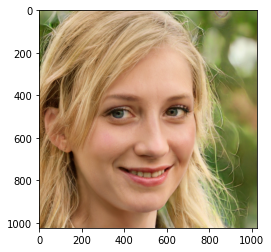

In [0]:
true_image,generator=model.generate_sample(8)

Previously optimised Trump encodings ...

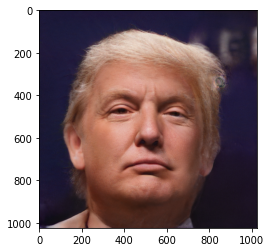

In [0]:
model.generate_from_encoding(np.expand_dims(np.load('/content/donald_trump_01.npy'),0))

The ResNet Model takes an input of (256,256,3) so we resize our input and we get an image from the Resnet Encodings

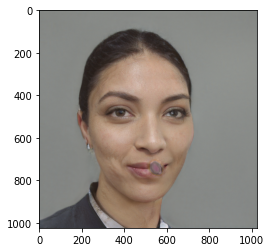

In [0]:
img=cv2.resize(true_image[0],(256,256))

ans=resnet.predict(np.expand_dims(img,0))
ans=model.generate_from_encoding(ans,True)

In [0]:
vgg1.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

The VGG model is truncated at the 9th layer and is tested here.

In [0]:
vgg=Model(vgg1.input, vgg1.layers[6].output)
print(vgg.predict(preprocess_input(np.random.rand(1,1024,1024,3)))[0].shape)
print(np.max(vgg.get_weights()[-1]))

(256, 256, 128)
0.63375777


Use this block only if you load an external image else the image above will be used as a true image

In [0]:
!mkdir raw_dir
!mkdir aligned_dir
%cd raw_dir
!gdown https://drive.google.com/u/0/uc?id=1CK6rCzZmN_grydyrJ9jbqgXwqJVrvhhJ&export=download
!gdown https://drive.google.com/u/0/uc?id=13TEjHDjFG5OpNYCkQElIml3PJ7yPqGpA&export=download
!gdown https://celeb-face.com/albums/userpics/2012y/11/11/43/404/AnnaKendrick2.jpg
%cd ..
!python align.py raw_dir/ aligned_dir/
!rm -rf raw_dir

/content/raw_dir
Downloading...
From: https://drive.google.com/u/0/uc?id=1CK6rCzZmN_grydyrJ9jbqgXwqJVrvhhJ
To: /content/raw_dir/obama.jpg
100% 102k/102k [00:00<00:00, 38.4MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=13TEjHDjFG5OpNYCkQElIml3PJ7yPqGpA
To: /content/raw_dir/rihanna.jpg
100% 87.1k/87.1k [00:00<00:00, 30.6MB/s]
Downloading...
From: https://celeb-face.com/albums/userpics/2012y/11/11/43/404/AnnaKendrick2.jpg
To: /content/raw_dir/AnnaKendrick2.jpg
100% 378k/378k [00:00<00:00, 6.00MB/s]
/content
Using TensorFlow backend.
2020-06-01 19:04:05.777454: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
64045056/64040097 [==============================] - 2s 0us/step
Aligning rihanna.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_dir/rihanna_01.png
Aligning obama.jpg ...
Getting landmarks...
Starting face alignment...
Wrote result aligned_dir/obama_01.png
Aligning AnnaKen

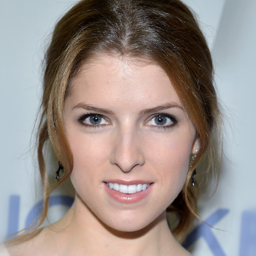

'img 0: AnnaKendrick2_01.png'

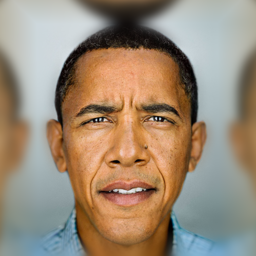

'img 1: obama_01.png'

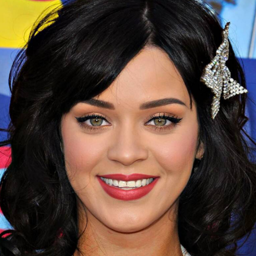

'img 2: rihanna_01.png'

In [0]:
import os
from PIL import Image
def display_folder_content(folder, res = 256):
  if folder[-1] != '/': folder += '/'
  for i, img_path in enumerate(sorted(os.listdir(folder))):
    if '.png' in img_path:
      display(Image.open(folder+img_path).resize((res,res)), 'img %d: %s' %(i, img_path))
      print('\n')
      
display_folder_content('aligned_dir')

Let's select the Anna Kendrick Picture and Generate the Encodings

In [0]:
true_image=Image.open('/content/aligned_dir/rihanna_01.png')
true_image=np.expand_dims(np.array(true_image,dtype="float32")/255,0)

We generate the true label y for our true_image. But we feed in a copy instead as because to prevent changes to the original image. It changes the Image to VGG Format

Problem is that the VGG Preprocess input takes an image by Reference not by value. So we make a copy of our true_image

In [0]:
img=np.copy(true_image)
true_label=vgg.predict(preprocess_input(img))[0]
true_label.shape

(256, 256, 128)

In [0]:
print(np.max(vgg.get_weights()[-1]))
ref_weights=vgg.get_weights()[-1]

0.63375777


We generate a base line image for our encoding to start off with

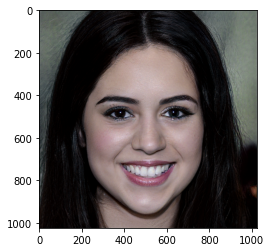

-0.44527644


In [0]:
generated_encoding=resnet.predict(np.expand_dims(cv2.resize(np.array((true_image[0]-0.5)*255),(256,256)),0))
model.generate_from_encoding(generated_encoding)
print(np.min(generated_encoding))


Here we stack up the generator with the VGG in order to make the derivatives travel all the back to the input latent vector and optimise it instead of the image.

In [0]:
class encoder_model(Model):
    
    def __init__(self, sys,vgg ):
        super(encoder_model, self).__init__()
        self.generator = sys
        self.lens = vgg 
        print('Model created.')
        
    def call(self, inputs):
        x = self.generator(inputs)
        x = tf.transpose(x,[0, 2, 3, 1])
        x = tf.image.resize(x,(224,224),antialias=True)
        
        x=preprocess_input(x)
        x = self.lens(x)
        return x

Testing and initialising our Custom Model named "Encoder"


In [0]:
encoder=encoder_model(generator,vgg)
encoder.predict(np.random.randn(1,18,512))[0].shape

Model created.


(56, 56, 128)

We freeze the weights of the Encoder

In [0]:
encoder.trainable=False

We define our loss functions here

In [0]:
from tensorflow.keras.losses import mean_squared_error as mse
def tf_custom_logcosh_loss(img1,img2):
  return tf.math.reduce_mean(tf.keras.losses.logcosh(img1,img2))
def custom_loss1(img1,img2,weights):
    i = tf.math.reduce_mean(tf.math.abs(weights*img1-weights*img2))
    i = i +  tf_custom_logcosh_loss(weights*img1,weights*img2)
    
    return i
  

Setup for TF Board

In [0]:
'''
import datetime
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_log_dir = 'logs/gradient_tape/' + current_time + '/train'
train_summary_writer = tf.summary.create_file_writer(train_log_dir)
'''

'\nimport datetime\ncurrent_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")\ntrain_log_dir = \'logs/gradient_tape/\' + current_time + \'/train\'\ntrain_summary_writer = tf.summary.create_file_writer(train_log_dir)\n'

The Training commences now. Sit back and enjoy the show. If you do not like the result go up and tune the constants of lr and decay and also the loss wights in custom_loss1

In [0]:
def training_prep(image=0,resnet=resnet,vgg=vgg,seed=0):
  if seed != 0:
      print('Original :')
      image,_ = model.generate_sample(seed)
      image = image[0]
      
  cc=np.copy(image)
  cc=tf.image.resize(cc,(224,224),antialias=True)
  label = vgg.predict(np.expand_dims(preprocess_input(cc.numpy()),0))[0]
  enco = resnet.predict(np.expand_dims(tf.image.resize((image-0.5)*255,(256,256),antialias=True),0))
  print('Base-Line :')
  model.generate_from_encoding(enco)
  if seed == 0:
    print('Original :')
    plt.imshow(image)
  return enco,label

If you want random sample just change the seed value and feed it in training_prep(seed).
Final Checks Made ...

Base-Line :


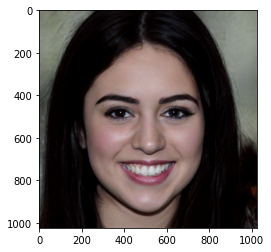

Original :


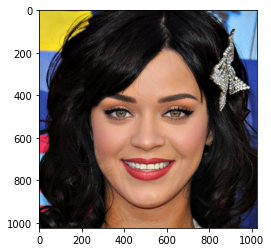

In [0]:
seed = 9112
X,y=training_prep(image=true_image[0],seed=0)

We define our custom train step for our need

In [0]:
def step(X,label,epoch):
  with tf.GradientTape(persistent=True) as tape:
    y=encoder(X)
    tape.watch([X])
    loss = custom_loss1( label,y,encoder.layers[1].get_weights()[-1])
    #loss = mse(y,label)
  gradients = tape.gradient(loss, [X])
  #grad2 = tape.gradient(loss,encoder.trainable_variables)
  
  optimizer.apply_gradients(zip([gradients][0] ,[X]))
  #optimizer.apply_gradients(zip(grad2,encoder.trainable_variables))
  latents.append(X)
  if epoch % 5 ==0:
    imm=model.generate_from_encoding(X.numpy(),is_visualize=False)
    ima.append(imm)
    
    print('Epoch : '+str(epoch))
    loss_array.append(tf.reduce_max(loss).numpy())
    print('Loss : '+str(tf.reduce_max(loss).numpy()))
    print('highest dlatent : '+str(tf.reduce_max(X).numpy()))
    print('Learning_rate : '+str(optimizer._decayed_lr(tf.float32).numpy()))
  return str(tf.reduce_max(loss).numpy())

In [0]:
latents=[]
loss_array=[]
ima=[]
from tensorflow.keras.optimizers import Adam

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.025,
    decay_steps=200,
    decay_rate=0.7)
import time
start=time.time()
EPOCHS=500
optimizer = Adam(learning_rate=0.028,amsgrad=True)#lr_schedule)#decay_rate=0.5)#,decay=0.005)
def trainer(X,y):
  x=tf.Variable(X)
  for epoch in range(EPOCHS*2):
    my_t=time.time()
    l=step(x,y,epoch)
    #print('Time for epoch :'+str(epoch)+'\t'+str(my_t-time.time()))
    clear_output(wait=True)
    #print(l)
    #if float(l) < 40:
      #if epoch < 300:
        #continue
      #else:
        #break

trainer(X,y)
name=np.random.randint(800)
print('Total Generation Time: '+str(time.time()-start))



Total Generation Time: 457.23281836509705


Validating our claims that it does generate back the Image we just got. We assume the loss is lowest in the last epoch so we save that as our best latent variable (latents array) and generate back the image. 
Kudos !

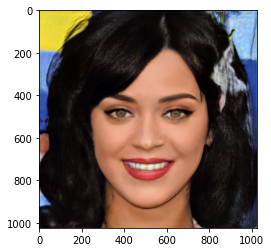

In [0]:
name=np.random.randint(800)
np.save('best_latent'+str(name)+'.npy',latents[-1].numpy())
p=model.generate_from_encoding(np.load('best_latent'+str(name)+'.npy'),is_visualize=False)

Generate the Cool gif of training

In [0]:
imageio.mimsave(str(name)+'.gif', ima*255)
clear_output(wait=False)

The Loss Array is plotted here

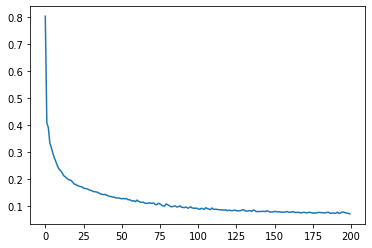

In [0]:
plt.plot(loss_array)

Let's load up Trump and check out how the blending goes ...

In [0]:
trump=np.load('/content/donald_trump_01.npy')
generated_img=np.load('/content/best_latent'+str(name)+'.npy')

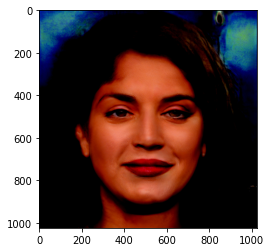

In [0]:
_=model.generate_from_encoding(trump*0.5+generated_img*0.5,is_visualize=False)

compile the model for completeness 

In [0]:
encoder.compile(optimizer=optimizer, loss=custom_loss1,
	metrics=["acc"])